# If numpy package considered as additional installation, download it using requirements.txt.

# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . , Hey , Dad, , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its , american , tradition , bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , "" , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , "" , LOL , ! , "

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , .. , http://tinyurl.com/lb5p6m

    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone , activation , delays , continue , , , Apple , offers , $ , 30 , http://twt.gs/l3Ki

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25 , MB , http://bit.ly/62mjw , Nice , ! , ! , !

    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming, : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three ,  great , bands , from , Scot , .. , http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T , - , Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [1]:
import os
from collections import defaultdict
# References:
# Reference1: https://arxiv.org/pdf/1508.07909.pdf
# Reference2: https://huggingface.co/learn/nlp-course/chapter6/5

def get_all_lines(path="data/"):
    """Function used to retrieve all text lines from files in specified directory.
    Returns list of lines of text"""
    files = [path + f for f in os.listdir(path)]
    lines = []
    for f in files:
        with open(f, "r") as file:
            lines.extend(file.readlines())
    return lines


def get_corpus(lines):
    """Function used to concatenate distinct lines of text into one string, removing line escape characters"""
    text = ""
    for i in lines:
        text += i[:-1] + " "
    return text


def get_vocab(corpus):
    """Function used to retrieve all unique characters used in corpus.
    Returns list of characters"""
    vocab = []
    for i in corpus:
        if i not in vocab:
            vocab.append(i)
    return vocab

In [2]:
from typing import List


class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size
        self.splits = {}  # Words divided into tokens
        self.word_freqs = defaultdict(int)  # Number of times each word used in a corpus
        self.vocab = None
        self.merges = {}  # Info about merged pairs

    def compute_initial_splits(self, text):
        """Computes frequencies of the words in corpus. Also splits words into individual characters"""
        for word in text.split():
            self.word_freqs[word] += 1
        self.splits = {word: [c for c in word] for word in self.word_freqs.keys()}

    def get_pairs(self):
        """Computes frequencies of each consequent pair in current splits"""
        pairs = defaultdict(int)
        for word, count in self.word_freqs.items():
            split = self.splits[word]
            if len(split) == 1:  # Skip if a word is fully tokenized already
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                pairs[pair] += count

        return pairs

    def merge(self, pair):
        """Updates splits merging respective pairs"""
        a, b = pair
        for word in self.word_freqs:
            split = self.splits[word]
            if len(split) == 1:
                continue
            i = 0
            while i < len(split) - 1:
                if split[i] == a and split[i + 1] == b:
                    split = split[:i] + [a + b] + split[i + 2:]  # Replace 2 pieces by 1
                else:
                    i += 1
            self.splits[word] = split

    def train(self, corpus: List[str]) -> None:
        self.compute_initial_splits(corpus)  # Compute initial splits and word frequencies
        self.vocab = get_vocab(corpus)  # Build initial vocabulary

        while len(self.vocab) < self.vocab_size:
            pairs = self.get_pairs()  # Get pair info
            best = max(pairs, key=pairs.get)  # Choose the most frequent
            if pairs[best] == 1:  # If the most frequent one used only once, then terminate.
                break

            self.merge(best)
            self.vocab.append(best[0] + best[1])  # Update vocab and merges
            self.merges[best] = best[0] + best[1]

    def tokenize(self, text: str) -> List[str]:
        splits = [[c for c in word] for word in text.split()]  # Splitting words into distinct characters
        for pair, result in self.merges.items():  # Consequently apply transformations to splits
            for idx, split in enumerate(splits):
                i = 0
                while i < len(split) - 1:
                    if split[i] == pair[0] and split[i + 1] == pair[1]:
                        split = split[:i] + [result] + split[i + 2:]
                    else:
                        i += 1
                splits[idx] = split
        return sum(splits, [])  # return joined tokens

In [3]:
# Example from train dataset
lines = get_all_lines()
corpus = get_corpus(lines)
tokenizer = BPETokenizer(1000)
tokenizer.train(corpus)
print(tokenizer.tokenize(
    "As you follow Me, I lead you along paths of newness: ways you have never imagined. - @Jesus_Calling  #SemST"))

['A', 's', 'you', 'follow', 'Me', ',', 'I', 'lead', 'you', 'al', 'ong', 'p', 'ath', 's', 'of', 'new', 'n', 'ess', ':', 'way', 's', 'you', 'have', 'never', 'im', 'ag', 'in', 'ed.', '-', '@', 'Jesus', '_', 'C', 'all', 'ing', '#SemST']


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [4]:
vocab_sizes = [len(get_vocab(corpus)), 250, 500, 750, 1000]
avg_tweet_lenghts = []
for i in vocab_sizes:
    tokenizer = BPETokenizer(i)
    tokenizer.train(corpus)
    tweet_lenghts = []
    for t in lines:
        tweet_lenghts.append(len(tokenizer.tokenize(t[:-1])))
    avg_tweet_lenghts.append(sum(tweet_lenghts) / len(tweet_lenghts))

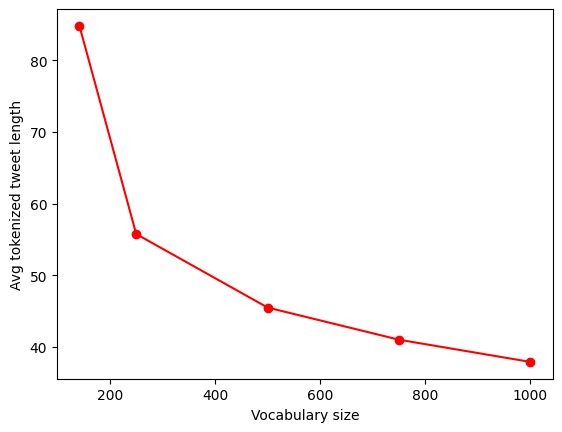

In [5]:
from matplotlib import pyplot as plt

plt.plot(vocab_sizes, avg_tweet_lenghts, color='red', marker="o")
plt.xlabel("Vocabulary size")
plt.ylabel("Avg tokenized tweet length")
plt.show()

#### As we can see, the larger the vocabulary, the shorter the average tweet length. I think the preferred vocabulary should be greater than 1000 because I noticed that many of the words from the tweets in the training set are tokenized in such a way that the tokens often don't represent the word in a meaningful way and there are too many of them.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

In [6]:
import urllib.request

# For this task I will use Lenta Short Sentences dataset's test part. It is a text dataset for language modelling for the Russian language. It consists of 236K sentences sampled from the Lenta News dataset, but I will use only 8k of them.

# # Downloading dataset. If needed, uncomment
# urllib.request.urlretrieve("https://raw.githubusercontent.com/zeinsh/lenta_short_sentences/master/lenta.test.txt",
#                            "lenta_sentences.txt")

In [7]:
with open("lenta_sentences.txt", "r", encoding='utf-8') as file:
    russian_lines = file.readlines()
russian_lines = russian_lines[:len(russian_lines) // 2]  # Using half of the sentences to speed up experiment
russian_corpus = get_corpus(russian_lines)
rus_tokenizer = None

In [8]:
vocab_sizes = [len(get_vocab(russian_corpus)), 250, 500, 750, 1000]
avg_sentence_lenghts = []
for i in vocab_sizes:
    rus_tokenizer = BPETokenizer(i)
    rus_tokenizer.train(russian_corpus)
    sentence_lenghts = []
    for t in russian_lines:
        sentence_lenghts.append(len(rus_tokenizer.tokenize(t[:-1])))
    avg_sentence_lenghts.append(sum(sentence_lenghts) / len(sentence_lenghts))

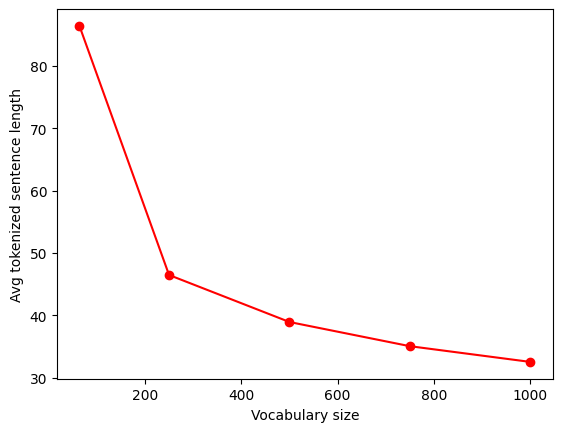

In [9]:
plt.plot(vocab_sizes, avg_sentence_lenghts, color='red', marker="o")
plt.xlabel("Vocabulary size")
plt.ylabel("Avg tokenized sentence length")
plt.show()

#### Looking into result of experiment with BPE applied to russian corpus, I can conclude that average length of the tokenized sentence do not differ from the average length of the tokenized tweet. I guess it is because of the same nature of the data: even though it is in different languages, the length of the sentences and tweets, as well as richness of the texts and variety of symbols used are approximately the same.

In [10]:
# Example of tokenization of russian text
result = rus_tokenizer.tokenize("его бюджет составил около DDD миллионов долларов , не считая затрат на рекламу .")
print(result)

['его', 'бюдж', 'ет', 'состави', 'л', 'около', 'DDD', 'миллионов', 'долларов', ',', 'не', 'счита', 'я', 'за', 'тра', 'т', 'на', 'ре', 'к', 'ла', 'му', '.']
